In [ ]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

In [ ]:
#Load data from GIT and display sample data of 5 records
#data_url = 'https://raw.githubusercontent.com/nayak-codebase/Data/main/train.csv';
#Data = pd.read_csv(data_url)
#Load data from local and display sample data of 5 records
from google.colab import files
uploaded = files.upload()
import io
Data = pd.read_csv(io.BytesIO(uploaded['train.csv']))


Saving train.csv to train.csv


In [ ]:
Data.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1174,0.292313,-0.004602,-0.093035,-0.975666,-0.953662,-0.898589,-0.978649,-0.948310,-0.887290,-0.905634,-0.550026,-0.752209,0.827741,0.681587,0.809601,-0.939233,-0.999557,-0.999132,-0.993726,-0.981287,-0.953042,-0.876416,-0.062111,-0.207424,-0.042672,0.025585,0.035539,0.209007,-0.093377,-0.001026,-0.068364,0.310786,-0.367466,0.022099,-0.036577,0.240447,-0.501685,0.430212,0.187236,0.737611,...,-0.898000,-1.000000,0.235242,-0.651162,-0.905009,-0.928418,-0.944700,-0.929657,-0.962163,-0.996422,-0.928418,-0.997367,-0.924863,-0.198627,-0.743590,0.156731,-0.677367,-0.912596,-0.950437,-0.958459,-0.950225,-0.972155,-0.972714,-0.950437,-0.998731,-0.946799,-0.431083,-1.000000,0.125986,-0.582962,-0.889985,-0.016318,0.130722,0.298647,0.055418,-0.681969,0.270244,0.157509,6,STANDING
1556,0.308907,-0.037327,-0.134571,-0.205253,0.140363,0.048250,-0.216939,0.064417,0.048677,0.126622,-0.159842,-0.220137,0.361536,-0.145002,0.190793,0.015430,-0.682764,-0.748319,-0.507273,-0.238987,-0.296899,-0.008865,0.302629,0.451106,0.268471,-0.167518,0.029739,0.219143,-0.114834,0.030761,0.077770,0.212571,-0.007023,-0.023384,0.071789,0.278798,-0.370086,-0.449585,-0.132153,0.705448,...,0.574949,-0.873016,0.080293,0.115264,-0.224239,-0.047593,-0.277676,-0.230142,-0.307951,-0.683753,-0.047593,-0.580159,-0.349394,0.765532,-0.794872,0.441491,-0.366573,-0.674798,0.031069,0.208143,0.325476,0.088429,-0.199897,0.031069,-0.339648,0.069181,0.716316,-0.873016,0.104737,-0.186753,-0.592584,-0.351819,0.748747,-0.602342,-0.504075,-0.842483,0.207037,0.015731,7,WALKING
3994,0.270290,-0.029851,-0.093731,-0.976067,-0.916127,-0.938908,-0.975743,-0.907796,-0.932168,-0.931917,-0.545747,-0.792702,0.823446,0.646450,0.823687,-0.941413,-0.999602,-0.998052,-0.997185,-0.975926,-0.914927,-0.919956,-0.362433,-0.377194,-0.140949,0.040632,-0.036266,0.017383,-0.181466,-0.177269,0.138113,0.016899,-0.089413,0.053372,-0.122245,0.092800,-0.072852,0.840731,0.858709,0.835176,...,-1.000000,-1.000000,0.284048,-0.463481,-0.747104,-0.969956,-0.950886,-0.955832,-0.950943,-0.993809,-0.969956,-0.998736,-0.981084,-0.564433,-1.0

In [ ]:
print('Shape of the data set: ' + str(Data.shape))


Shape of the data set: (7352, 563)


In [ ]:
# Print the labels available for the data set
Labels = Data['Activity']
Data = Data.drop(['Activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [ ]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)


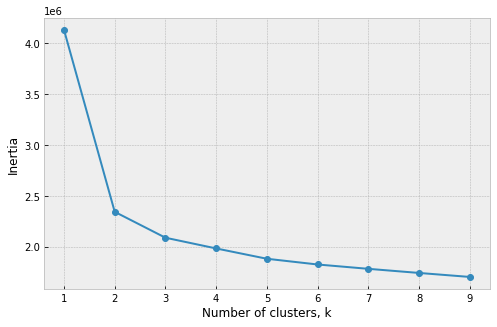

In [ ]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
"""
Function k_means applies k-means clustering alrorithm on dataset and prints the cluster and actual labels.    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
     Output:
    crosstab of cluster and actual labels, Tracking scores above 95%
"""
def k_means(n_clust, data_frame, true_labels):

    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [ ]:
#Display value of kmeans with 6 clusters as there are 6 variations as per labels
k_means(n_clust=6, data_frame=Data, true_labels=Labels)


orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,0,0,0,68,167,5
1,270,314,374,0,0,2
2,4,1,0,644,200,856
3,26,885,1000,0,0,0
4,0,0,0,514,619,210
5,1107,86,0,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1826030   0.541   0.578   0.559   0.420   0.559    0.108


In [ ]:
#Upon varying the count of clusters and executing based on the optimal k value graph, 2 seems to be providing accurate results

k_means(n_clust=2, data_frame=Data, true_labels=Labels)


orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,1396,1285,1374,0,0,8
1,11,1,0,1226,986,1065


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2343544   0.376   0.976   0.543   0.328   0.543    0.396


In [ ]:
#change labels into binary: 0 - not moving, 1 - moving as optimal k value is 2 and has accuracy of above 97%
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [ ]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)


orig_label,0,1
clust_label,,
0,4055,8
1,12,3277


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2343544   0.973   0.973   0.973   0.989   0.973    0.396
